In [1]:
# Linear algebra and data manipulation imports
import pandas as pd
import numpy  as np

In [2]:
# Visualization imports
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
%matplotlib inline

In [3]:
DATA_DIR='../data/'

# Import raw train data and test data
train = pd.read_csv(DATA_DIR + 'raw_titanic_train.csv')
test = pd.read_csv(DATA_DIR + 'raw_titanic_test.csv')

In [4]:
# Check first five rows of raw train data set
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Note that *Survived*, *Pclass*, *Sex* and *Embarked* are categorical variables here. So we need dummy variables to represent each category using one-hot encoding and avoiding full correlation between the correlations (a category is omitted to prevent full correlation)


**Representations**

*Survived*: perfect, 1 represents survived and 0 represents not-survived

*PClass*: 1 represents 'First Class', 2 represents 'Second Class' and 3 represents 'Third Class'

*Sex*: Male and female

*Embarked*: C represents 'Cherbourg', S represents 'Southampton' and Q represents 'Queenstown'

In [5]:
# Check info of raw train dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# Check shape of raw train dataset
train.shape

(891, 12)

In [7]:
# Show description of raw train dataset for numerical columns
# (may include some categorical columns as well)
train.describe()

# Note that 'Survived' and 'Pclass' shown are categorical variables and not numerical

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
# Check the first five rows of the raw test data
test.head()

# Has same columns as the train data except the label, 'Survived' is out

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
# Check the dimensions (row count) of the raw test data
test.shape

(418, 11)

In [10]:
# Show the description of the raw test data, excluding non-numeric columns
test.describe()

# Note that Pclass' shown is a categorical variable

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


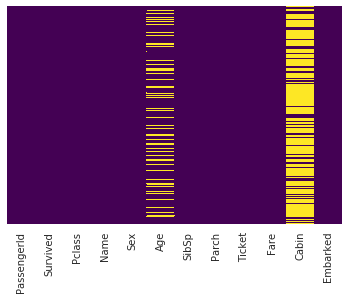

In [11]:
# Visualize null values in raw train data

sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

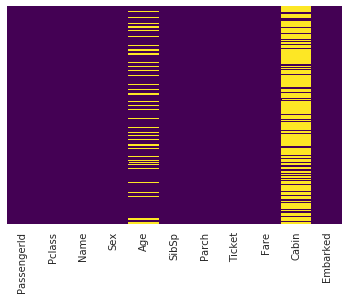

In [12]:
# Visualize null values in raw test data

sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

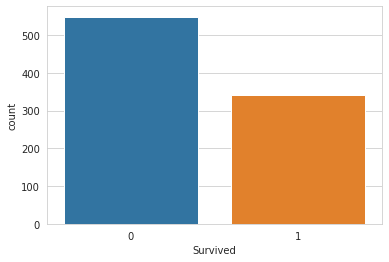

In [13]:
# Visualizing classification label 'Survived'

sns.countplot(train['Survived'])

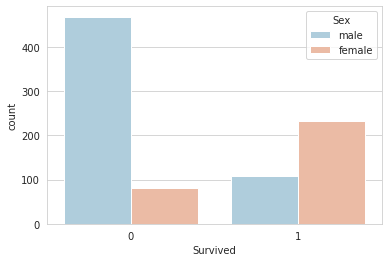

In [14]:
# Visualizing classification label 'Survived' for 'Sex' feature

sns.countplot(x='Survived',data=train,hue='Sex',palette='RdBu_r')

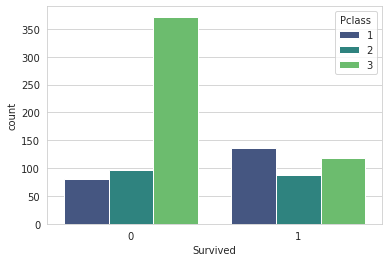

In [15]:
# Visualizing classification label 'Survived' for 'Pclass' feature

sns.countplot(x='Survived',data=train,hue='Pclass',palette='viridis')

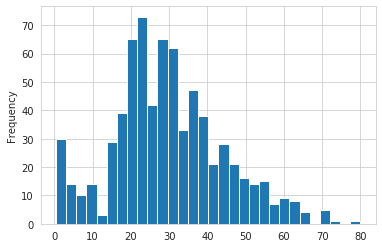

In [16]:
# sns.distplot(train['Age'].dropna(),kde=False,bins=30)

train['Age'].dropna().plot.hist(bins=30)

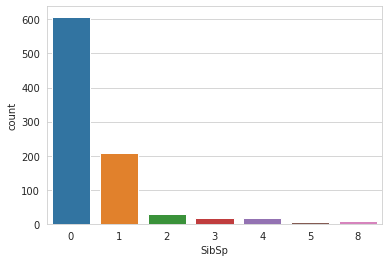

In [17]:
sns.countplot(x='SibSp',data=train)

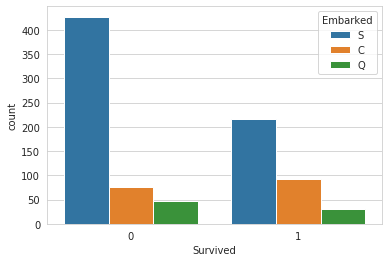

In [18]:
sns.countplot(x='Survived', data=train, hue='Embarked')

# it looks like many passenger embarked from Southampton.
# Nonetheless, this distributiion does not clearly show any relevan correlation between embarkation and survival.

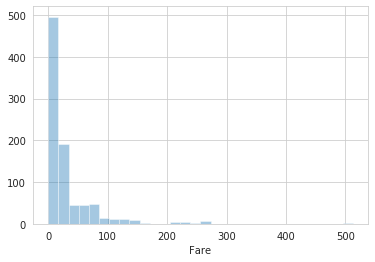

In [19]:
sns.distplot(train['Fare'],kde=False,bins=30)

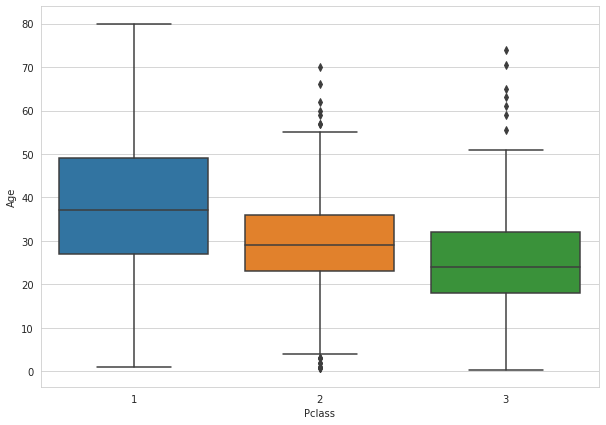

In [20]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=train)

In [21]:
Pclass1Mean = train['Age'][train['Pclass'] == 1].mean()
Pclass2Mean = train['Age'][train['Pclass'] == 2].mean()
Pclass3Mean = train['Age'][train['Pclass'] == 3].mean()

def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if (pd.isnull(Age)):
        if Pclass == 1:
            return Pclass1Mean
        elif Pclass == 2:
            return Pclass2Mean
        else:
            return Pclass3Mean
    else:
        return Age
    
train['Age'] = train[['Age', 'Pclass']].apply(impute_age,axis=1)

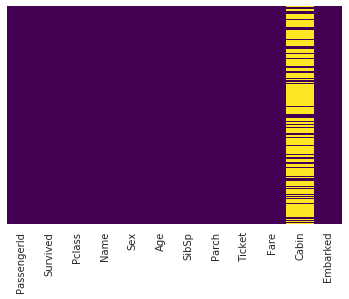

In [22]:
# Visualize null values in raw train data
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [23]:
# Cabin has to many missing values, could make it categorical as Cabin Available vs Cabin Inavailable
train.drop('Cabin',axis=1,inplace=True)

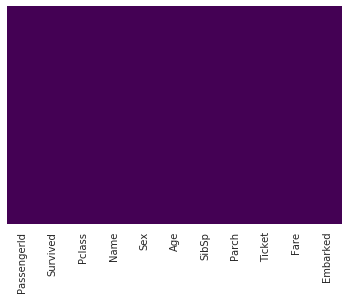

In [24]:
# Visualize null values in raw test data
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [25]:
# save clean train data to csv file

train.to_csv(DATA_DIR + 'clean_titanic_train.csv',index=False)

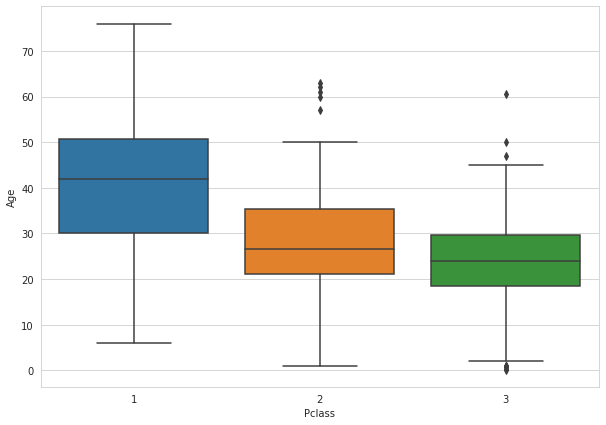

In [26]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=test)

In [27]:
Pclass1Mean = test['Age'][test['Pclass'] == 1].mean()
Pclass2Mean = test['Age'][test['Pclass'] == 2].mean()
Pclass3Mean = test['Age'][test['Pclass'] == 3].mean()

def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if (pd.isnull(Age)):
        if Pclass == 1:
            return Pclass1Mean
        elif Pclass == 2:
            return Pclass2Mean
        else:
            return Pclass3Mean
    else:
        return Age
    
test['Age'] = test[['Age', 'Pclass']].apply(impute_age,axis=1)

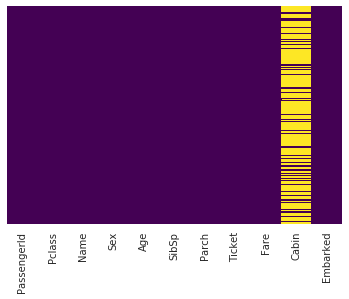

In [28]:
# Visualize null values in raw test data
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')